# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [2]:
import numpy as np

### Simulation du lancé de dé

In [3]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [4]:
Roll()

5

### Compléter le code et commenter

In [5]:
A=0
S=10
NA=0
temp=Roll()
NA+=1
print(NA,temp)
while temp!=6:
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print('Sortie aprés {} coups'.format(NA))
while (A<S):
    temp=Roll()
    NA+=1
    if temp+A<S:
        A=A+temp
        print(NA,temp,A)
    elif temp+A>S :
        print(NA,temp,A)
    else:
        A=A+temp 
        print(NA,temp,A)



1 6
Sortie aprés 1 coups
2 6 7
3 3 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [6]:
def sim(S):
    A=0
    NA=0
    temp=Roll()
    NA+=1
    #print(NA,temp)
    while temp!=6:
        temp=Roll()
        NA+=1
        #print(NA,temp)
    A=1
    #print('Sortie aprés {} coups'.format(NA))
    while A!=S :
        temp=Roll()
        NA+=1
        if temp+A<S:
            A=A+temp
            #print(NA,temp,A)
        elif temp+A>S :
            n=S-A
            #print(NA,temp,A)
        else:
            A=A+temp
            #print(NA,temp,A)
    return NA #
    

In [7]:
sim(20)

23

### Simulation de $10^6$  scénario 

In [18]:
Freq=np.fromiter((sim(20) for i in range(10**6)),dtype=int)

KeyboardInterrupt: 

In [9]:
ESP=Freq.sum()/10**6

In [13]:
print('esperance de NA =',ESP)

esperance de NA = 16.187161


In [19]:
#le moyen d'essais pour gagner le jeu est 16.187161

In [20]:
x=list(range(10,20))

In [22]:
y=[sum(sim(u) for i in range(500000))/500000 for u in x]

In [23]:
import matplotlib.pyplot as plt

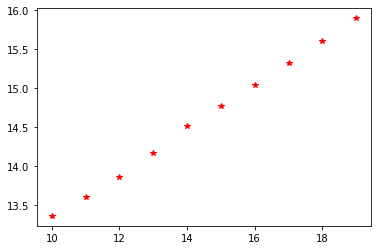

In [35]:
plt.plot(x,y,'*r')
plt.show()

In [36]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [37]:
print('a=',slope)
#a

a= 0.28537670303030305


In [38]:
print('b=',intercept)
#b

b= 10.476919806060605


In [39]:
yy=[slope *u +intercept for u in x]
#equation de droite lineare

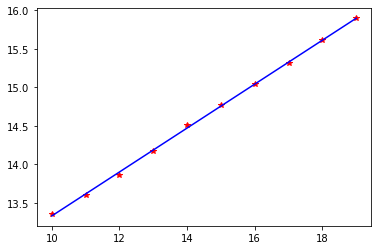

In [40]:
plt.plot(x,y,'*r',x,yy,'-b')
plt.show()